# NJ PPP Loan Data Analysis
<b>Data acquired from <a href="https://data.nj.gov/Government-Finance/PPP-Cares-Act-Loan-Totals-to-New-Jersey-Businesses/riep-z5cp">nj.data.gov</a>.</b>

## Background
<p>
    The Paycheck Protection Program (PPP) loans provide small businesses with the resources they need to maintain their payroll, hire back employees who may have been laid off, and cover applicable overhead. This data set includes businesses in New Jersey who received PPP funding, how much funding the employer received & how many jobs the employer claims they saved. The NAICS (National Industry Classification) was provided by the loan recipient.
</p>
<p>
    This dataset was used to analyze the distribution of Payment Protection Program loans within New Jersey. In this notebook is a breakdown consisting of loan bracket, business owner race, and other important distinctions within PPP loan distribution. 
</p>

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import numpy as np

import matplotlib as mpl
from matplotlib import rcParams
from matplotlib import style
mpl.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline

import csv
import math
import json

### General Overview

In [2]:
INIT_CSV = pd.DataFrame(pd.read_csv('PPP_Data_fixed - Final.csv'))
print('\n')
profile = ProfileReport(INIT_CSV, title='CSV Pandas Profiling Report', explorative = True, minimal = True)

In [3]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preview

In [4]:
data = INIT_CSV.copy()
data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,21848,21849,21850,21851,21852,21853,21854,21855,21856,21857
Loan Range,"$150,000-$350,000","$2,000,000-$5,000,000","$150,000-$350,000","$150,000-$350,000","$150,000-$350,000","$1,000,000-$2,000,000","$1,000,000-$2,000,000","$150,000-$350,000","$150,000-$350,000","$350,000-$1,000,000",...,"$150,000-$350,000","$150,000-$350,000","$150,000-$350,000","$2,000,000-$5,000,000","$1,000,000-$2,000,000","$150,000-$350,000","$150,000-$350,000","$150,000-$350,000","$150,000-$350,000","$350,000-$1,000,000"
Business Name,MAXUM EXPO SERVICES LLC,JRCRUZ CORP,FRIENDLY DENTAL NJ LLC,COR MIK LLC,"TCC HOLDING, LLC",NOTRA TRADING CORP,JERSEY ELEVATOR COMPANY INC,CAROUSEL CORPORATION,JWL MARKETING INC,HISPANIC VENTURES CONTRACTING LLC,...,WYCKOFF FRANKLIN LAKES SYNAGOGUE,"Z &AMP; Z TRADING, INC.",TRAP-ZAP ENVIRONMENTAL SYSTEMS INC.,WYCKOFF FAMILY YMCA,"THE HAAR COMPANY, INC.",TEDKEN CORP.,BODY BY MULE,POOL DESIGNS,"DOERLER LANDSCAPES, INC.",PILLAR OF FIRE
Address,Maxum Expo Services LLC,675 Line Road,112 OXFORD LN,1077 Route 34 Store F,400 LLoyd Rd,75 LOWER MAIN STREET,657 Line Rd,1182 Highway 34,555 NEW JERSEY AVE STE 2,750 W California Ave,...,585 RUSSELL AVE,39 HOWARD ST,255 Braen Avenue,691 Wyckoff Avenue,525 CEDAR HILL AVE,290 Franklin Avenue,550 ROUTE 130,22 Route 130,5570 South Broad Street,10 Chapel Drive
City,109 HILL ST,ABERDEEN,ABERDEEN,ABERDEEN,ABERDEEN,ABERDEEN,ABERDEEN,ABERDEEN,ABSECON,ABSECON,...,WYCKOFF,WYCKOFF,WYCKOFF,WYCKOFF,WYCKOFF,WYCKOFF,YARDVILLE,YARDVILLE,YARDVILLE,ZAREPHATH
State,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,...,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ,NJ
Zip,8059,7747,7747,7747,7747,7747,7747,7747,8201,8201,...,7481,7481,7481,7481,7481,7481,8620,8620,8620,8890
NAICS Code,453998.0,237110.0,621210.0,722513.0,713910.0,423220.0,238290.0,611110.0,541613.0,813319.0,...,813110.0,541890.0,423840.0,624410.0,722513.0,811121.0,811121.0,453998.0,541320.0,813110.0
Business Type,Limited Liability Company(LLC),Limited Liability Company(LLC),Subchapter S Corporation,Limited Liability Company(LLC),Limited Liability Company(LLC),Corporation,Corporation,Subchapter S Corporation,Corporation,Limited Liability Company(LLC),...,Non-Profit Organization,Corporation,Corporation,Non-Profit Organization,Corporation,Corporation,Subchapter S Corporation,Corporation,Corporation,Non-Profit Organization
Race Ethnicity,Unanswered,Unanswered,Unanswered,Unanswered,Unanswered,Unanswered,Unanswered,White,Unanswered,Unanswered,...,Unanswered,Unanswered,Unanswered,Unanswered,White,Unanswered,Unanswered,Unanswered,Unanswered,Unanswered
Gender,Unanswered,Unanswered,Unanswered,Unanswered,Unanswered,Unanswered,Unanswered,Male Owned,Unanswered,Unanswered,...,Unanswered,Unanswered,Unanswered,Unanswered,Male Owned,Female Owned,Unanswered,Unanswered,Unanswered,Unanswered


### Businesses owned by a White/Caucasian Individual

In [5]:
WhtOwned = INIT_CSV.copy()
whtNum = WhtOwned[WhtOwned['Race Ethnicity'].str.contains("White")]
num = str(whtNum.shape[0])
print("There are " + num + " White owned businesses")
whtNum.head()

There are 973 White owned businesses


,Loan Range,Business Name,Address,City,State,Zip,NAICS Code,Business Type,Race Ethnicity,Gender,Veteran,n-Profit,Jobs Retained,Date Approved,Lender,Congressional District,Georeference
7,"$150,000-$350,000",CAROUSEL CORPORATION,1182 Highway 34,ABERDEEN,NJ,7747,611110.0,Subchapter S Corporation,White,Male Owned,Non-Veteran,NO,51.0,4/30/2020,LCA Bank Corporation,NJ-04,POINT (-74.222442 40.393991)
17,"$150,000-$350,000",GOURMET ITALIAN CUISINE,321 S PITNEY RD,ABSECON,NJ,8205,722511.0,Corporation,White,Male Owned,Non-Veteran,NO,43.0,4/6/2020,"OceanFirst Bank, National Association",NJ-02,POINT (-74.493619 39.465681)
89,"$150,000-$350,000","OCEANSIDE SERVICE, INC.",531 Main Street,ALLENHURST,NJ,7711,561790.0,Corporation,White,Male Owned,Non-Veteran,NO,22.0,4/10/2020,Citizens Community Federal National Association,NJ-04,POINT (-74.00706 40.234503)
105,"$350,000-$1,000,000",COASTAL LEARNING CENTER-MONMOUTH CORPORATION,7.50 PO BOX 439,ALLENWOOD,NJ,8720,611110.0,Corporation,White,Male Owned,Non-Veteran,NO,47.0,4/28/2020,"OceanFirst Bank, National Association",NJ-04,NaN
109,"$1,000,000-$2,000,000",RANCH HOPE,45 SAWMILL ROAD,ALLOWAY,NJ,8001,624110.0,Non-Profit Organization,White,Male Owned,Unanswered,TRUE,195.0,4/10/2020,The Pennsville National Bank,NJ-02,POINT (-75.363284 39.549713)


### Businesses owned by a Black/African American Individual

In [6]:
AfrOwned = INIT_CSV.copy()
blkNum = AfrOwned[AfrOwned['Race Ethnicity'].str.contains("Black")]
num = str(blkNum.shape[0])
print("There are " + num + " Black/African American owned businesses")
blkNum.head()

There are 26 Black/African American owned businesses


,Loan Range,Business Name,Address,City,State,Zip,NAICS Code,Business Type,Race Ethnicity,Gender,Veteran,n-Profit,Jobs Retained,Date Approved,Lender,Congressional District,Georeference
162,"$1,000,000-$2,000,000",CENTRAL JERSEY URGENT CARE LLC,731 Highway 35,ASBURY PARK,NJ,7712,621111.0,Limited Liability Company(LLC),Black or African American,Male Owned,Non-Veteran,NO,195.0,4/15/2020,"OceanFirst Bank, National Association",NJ-04,POINT (-74.038384 40.227118)
955,"$150,000-$350,000",NEXT MILE LLC,109 GARNER AVENUE,BLOOMFIELD,NJ,7003,484110.0,Limited Liability Company(LLC),Black or African American,Male Owned,Veteran,NO,52.0,6/29/2020,Cross River Bank,NJ-09,POINT (-74.17655 40.837934)
994,"$150,000-$350,000",ALPHA MILE LLC,109 GARNER AVENUE,BLOOMFIELD,NJ,7003,484110.0,Partnership,Black or African American,Female Owned,Non-Veteran,NO,50.0,5/26/2020,Cross River Bank,NJ-09,POINT (-74.17655 40.837934)
1442,"$2,000,000-$5,000,000",OBANTA LLC,1065 US HIGHWAY 22 STE 3,BRIDGEWATER,NJ,8807,621112.0,Limited Liability Company(LLC),Black or African American,Male Owned,Non-Veteran,NO,275.0,4/9/2020,Radius Bank,NJ-07,POINT (-74.59898 40.580445)
1746,"$350,000-$1,000,000","ATS GROUP, LLC.",423 MARKET ST STE 1,CAMDEN,NJ,8102,425110.0,Limited Liability Company(LLC),Black or African American,Unanswered,Unanswered,NO,12.0,4/14/2020,Truist Bank d/b/a Branch Banking & Trust Co,NJ-01,POINT (-75.121592 39.945762)


### Businesses owned by an Asian Individual

In [7]:
AsianOwned = INIT_CSV.copy()
asianNum = AsianOwned[AsianOwned['Race Ethnicity'].str.contains("Asian")]
num = str(asianNum.shape[0])
print("There are " + num + " Asian owned businesses")
asianNum.head()

There are 269 Asian owned businesses


,Loan Range,Business Name,Address,City,State,Zip,NAICS Code,Business Type,Race Ethnicity,Gender,Veteran,n-Profit,Jobs Retained,Date Approved,Lender,Congressional District,Georeference
195,"$350,000-$1,000,000","TBD, INC.",660 Cookman Avenue,ASBURY PARK,NJ,7712,722511.0,Corporation,Asian,Male Owned,Non-Veteran,NO,75.0,4/16/2020,First Bank,NJ-04,POINT (-74.012061 40.215755)
477,"$150,000-$350,000",GOLDEN FORTUNE IMPORT & EXPORT CORP.,"55 Hook Road, Front Bldg",BAYONNE,NJ,7002,424410.0,Corporation,Asian,Male Owned,Non-Veteran,NO,30.0,4/10/2020,East West Bank,NJ-08,POINT (-74.096306 40.652135)
763,"$350,000-$1,000,000",AM/PM WALK-IN URGENT CARE CLINIC LLC,19 S WASHINGTON AVE,BERGENFIELD,NJ,7621,621111.0,Limited Liability Company(LLC),Asian,Male Owned,Non-Veteran,NO,65.0,4/11/2020,Provident Bank,NJ-05,POINT (-73.996234 40.927171)
802,"$150,000-$350,000","BRIGHT BEGINNINGS QUALITY CARE CENTER, LLC",246 Springfield Ave,BERKELEY HEIGHTS,NJ,7922,624410.0,Limited Liability Company(LLC),Asian,Male Owned,Non-Veteran,NO,40.0,4/6/2020,Lakeland Bank,NJ-07,POINT (-74.433778 40.689396)
993,"$150,000-$350,000",DAS EDUCATION INC,156 Washington Street,BLOOMFIELD,NJ,7003,624410.0,Corporation,Asian,Male Owned,Non-Veteran,NO,24.0,4/6/2020,Berkshire Bank,NJ-09,POINT (-74.202724 40.792875)


### How many jobs were retained per industry?

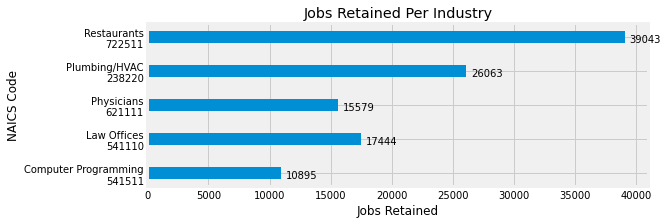

In [8]:
df = INIT_CSV.copy()
df = df[["NAICS Code", "Jobs Retained"]]

# Remove rows with empty data
df.dropna(inplace = True)

# Make sorted list of unique NAICS codes
codes = sorted(list(set(np.array([238220, 541110, 541511, 621111, 722511]))))
decodes = sorted(list(set(np.array(["Plumbing/HVAC\n238220", "Law Offices\n541110", "Computer Programming\n541511", "Physicians\n621111", "Restaurants\n722511"]))))
jobs = []

# Sum jobs retained for each job code
for code in codes:
    total = df.loc[df["NAICS Code"] == code, "Jobs Retained"].sum()
    jobs.append(total)
    
# Make ticks evenly spaced despite their values
x_pos = np.arange(len(codes))

fig, ax = plt.subplots(figsize=(8,3))

# Add chart labels
plt.barh(x_pos, jobs, .35)
plt.title("Jobs Retained Per Industry")
plt.ylabel("NAICS Code")
plt.xlabel("Jobs Retained")

plt.yticks(x_pos, decodes)
plt.setp(ax.yaxis.get_majorticklabels(), rotation=0, ha="right", rotation_mode="anchor") 

for p in ax.patches:
#     ax.annotate(str(p.get_x()), (p.get_width() * 1.005, p.get_x() * 1.005))
    ax.annotate(str(p.get_width().astype(int)), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 1), textcoords='offset points')
    
plt.show()

### How many businesses took loans in each bracket?

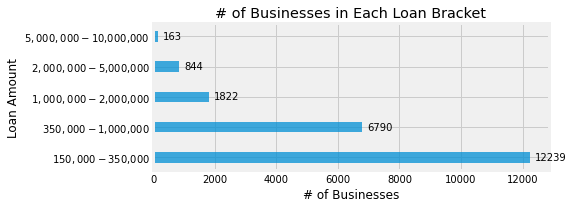

In [9]:
pd.set_option('precision', 0)
fields = ['Loan Range', 'NAICS Code']
order = ['$5,000,000-$10,000,000', '$2,000,000-$5,000,000', '$1,000,000-$2,000,000', '$350,000-$1,000,000', '$150,000-$350,000']
dfJob = pd.DataFrame(pd.read_csv('PPP_Data_fixed - Final.csv', skipinitialspace=True, usecols=fields))
ax = dfJob.groupby('Loan Range').size().reindex(order)\
.plot(kind='barh', alpha=0.75, figsize=(8,3),\
      title="# of Businesses in Each Loan Bracket",\
      xlabel="Loan Amount", width=.35)
plt.gca().invert_yaxis()
for p in ax.patches:
    ax.annotate(str(p.get_width()), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, -8), textcoords='offset points')
plt.xlabel("# of Businesses")
plt.tight_layout()

### Exploring specific cities in New Jersey

In [10]:
cities = {}

with open('PPP_Data_fixed - Final.csv', 'r') as f_in:
    reader = csv.reader(f_in)
    count = 0
    for row in reader:
        if len(row) == 17:
            string = row[3]
        elif len(row) == 19:
            string = row[5]
        elif len(row) == 18:
            string = row[4]
        
        if string not in cities:
            cities[string] = 1
        else:
            cities[string] += 1
        count += 1
f_in.close()

city = input("Which city would you like to explore? ")
city = city.upper()
print('\n' + city.title() + " had " + str(cities.get(city.upper())) + " businesses recieve a PPP loan.")

#    df[(df['A'] > 1) | (df['B'] < -1)]

AfrOwned = INIT_CSV.copy()
blkNum = AfrOwned[(AfrOwned['Race Ethnicity'] == 'Black or African American') & (AfrOwned['City'] == city)]
num = str(blkNum.shape[0])
print(num + " of which are Black/African American owned businesses")

WhtOwned = INIT_CSV.copy()
whtNum = WhtOwned[(WhtOwned['Race Ethnicity'] == 'White') & (WhtOwned['City'] == city)]
num = str(whtNum.shape[0])
print(num + " of which are White owned businesses")

AsianOwned = INIT_CSV.copy()
asianNum = AsianOwned[(AsianOwned['Race Ethnicity'] == 'Asian') & (AsianOwned['City'] == city)]
num = str(asianNum.shape[0])
print(num + " of which are Asian owned businesses")

HispOwned = INIT_CSV.copy()
hispNum = HispOwned[(HispOwned['Race Ethnicity'] == 'Hispanic') & (HispOwned['City'] == city)]
num = str(hispNum.shape[0])
print(num + " of which are Hispanic owned businesses")

NativeOwned = INIT_CSV.copy()
natNum = NativeOwned[(NativeOwned['Race Ethnicity'] == 'American Indian or Alaska Native') & (NativeOwned['City'] == city)]
num = str(natNum.shape[0])
print(num + " of which are American Indian/Alaskan Native owned businesses")

NaNOwned = INIT_CSV.copy()
NaNNum = NaNOwned[(NaNOwned['Race Ethnicity'] == 'Unanswered') & (NaNOwned['City'] == city)]
num = str(NaNNum.shape[0])
print(num + " businesses did not answer")

Which city would you like to explore? Union

Union had 157 businesses recieve a PPP loan.
1 of which are Black/African American owned businesses
6 of which are White owned businesses
1 of which are Asian owned businesses
2 of which are Hispanic owned businesses
0 of which are American Indian/Alaskan Native owned businesses
147 businesses did not answer.
